# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Rafly Anugrah Syahputra
- **Email:** rafly12314@gmail.com
- **ID Dicoding:** rafly_syahputra12314

## Menentukan Pertanyaan Bisnis

- Bagaimana tren konsentrasi PM2.5 dan PM10 di setiap tahun dan musim?
- Apakah terdapat korelasi antara SO₂, NO₂, CO, dan O₃ dengan tingkat PM2.5 dan PM10?

## Import Semua Packages/Library yang Digunakan

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [38]:
df=pd.read_csv("/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- no: Nomor urut atau indeks unik untuk setiap baris data.
-year: Tahun pengukuran data (2013-2017).
-month: Bulan pengukuran data (1-12).
-day: Hari dalam bulan (1-31).
-hour: Jam pengukuran data (0-23).
-pm2.5: Konsentrasi partikel halus (partikulat berukuran ≤2.5 µm) dalam udara.
-pm10: Konsentrasi partikel kasar (partikulat berukuran ≤10 µm).
-so2: Konsentrasi sulfur dioksida (SO₂) dalam udara.
-no2: Konsentrasi nitrogen dioksida (NO₂).
-co: Konsentrasi karbon monoksida (CO).
-o3: Konsentrasi ozon (O₃) di permukaan.
-temp: Suhu lingkungan (°C).
-pres: Tekanan atmosfer (hPa).
-dewp: Titik embun (°C).
-rain: Curah hujan (mm).
-wd: Arah angin (kategorikal, seperti 'N', 'NW').
-wspm: Kecepatan angin (m/s).
-station: Nama stasiun pengukuran.

### Assessing Data

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [40]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- xxx
- xxx

### Cleaning Data

# Memeriksa Data Nan

In [41]:
missing_values = df.isnull().sum()
display(missing_values)

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


**Insight:**
- xxx
- xxx

# Imputation Data

In [42]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

# Fill categorical missing values with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-42-01b47a0d255d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-42-01b47a0d255d>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [43]:
missing_values_after = df.isnull().sum()
display(missing_values_after)


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


# Mendeteksi Outlier dan Menghapus

In [44]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove rows with outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [45]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


# Mendrop Data Duplicate

In [46]:
df.drop_duplicates(inplace=True)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin


In [47]:
df.columns = df.columns.str.lower()

In [48]:
print("Cleaned Data Shape:", df.shape)
display(df.head())


Cleaned Data Shape: (24747, 18)


,no,year,month,day,hour,pm2.5,pm10,so2,no2,co,o3,temp,pres,dewp,rain,wd,wspm,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin


# Menyimpan Data Bersih ke CSV


In [49]:
df.to_csv("Cleaned_data.csv")

## Exploratory Data Analysis (EDA)

### Explore ...

# distribusi data dari kolom pm2.5,pm10,o3


<Figure size 1200x600 with 0 Axes>

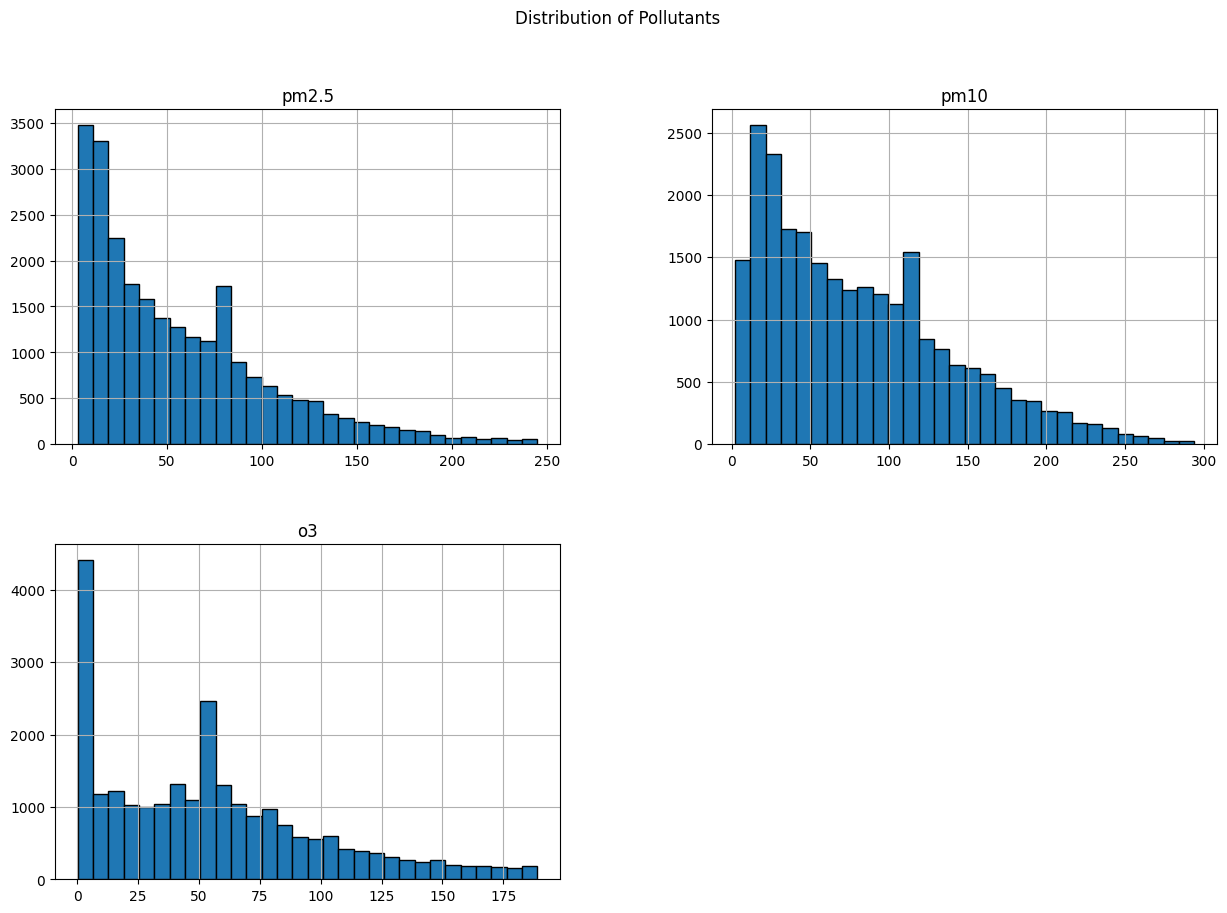

In [50]:
plt.figure(figsize=(12, 6))
df[['pm2.5', 'pm10', 'o3']].hist(bins=30, figsize=(15, 10), layout=(2, 2), edgecolor='black')
plt.suptitle("Distribution of Pollutants")
plt.show()

# Boxplot per bulan kolom pm2.5


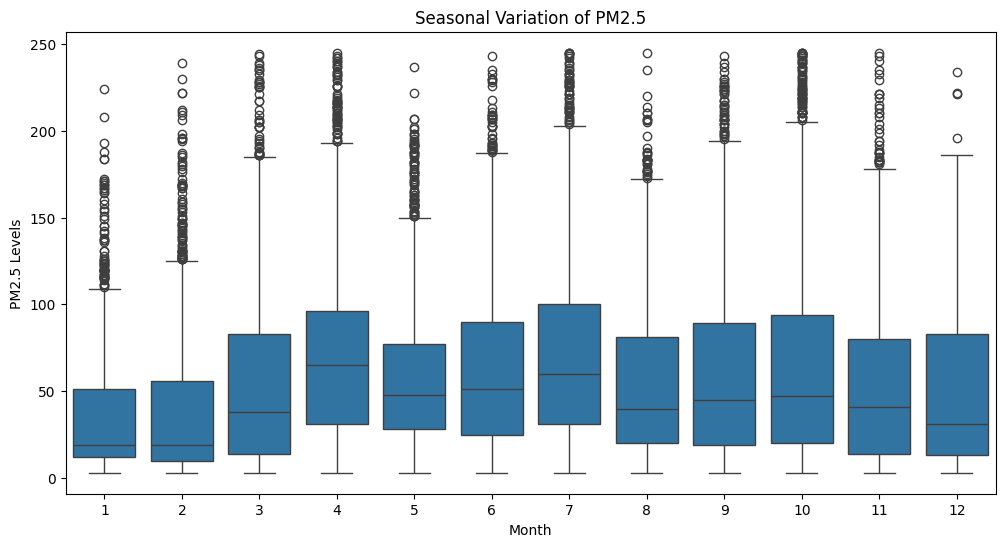

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='pm2.5', data=df.reset_index())
plt.title("Seasonal Variation of PM2.5")
plt.xlabel("Month")
plt.ylabel("PM2.5 Levels")
plt.show()

# Pair plot kolom data pm2.5,pm10,so2,temp,wspm.

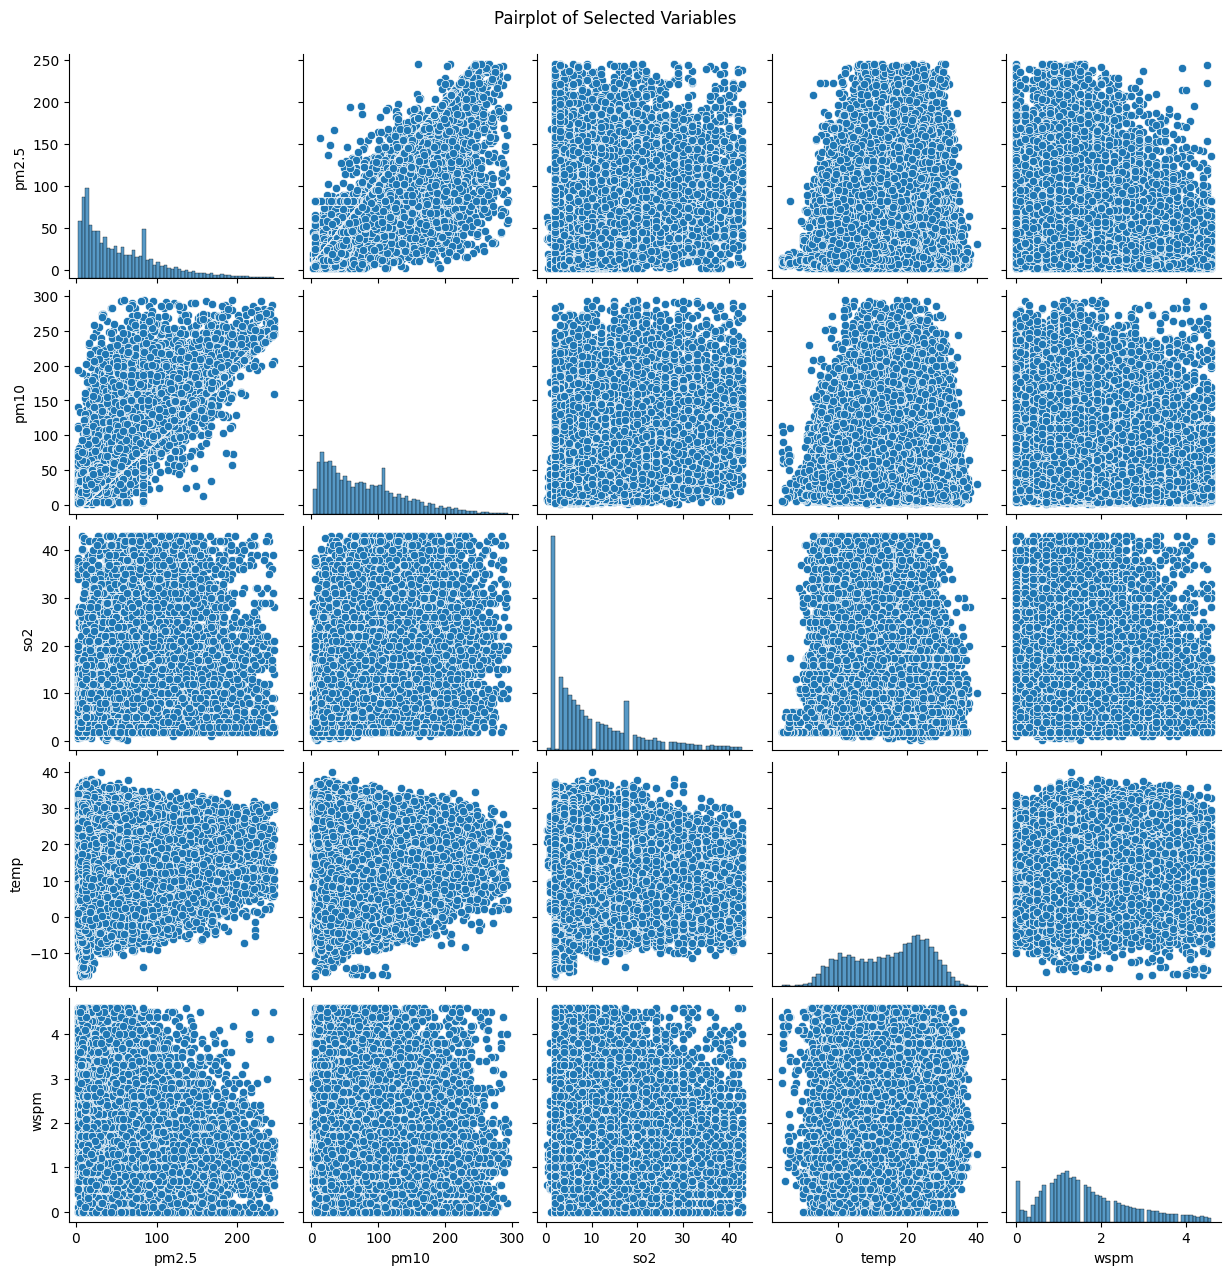

In [52]:
sns.pairplot(df[['pm2.5', 'pm10', 'so2', 'temp', 'wspm']])
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()

**Insight:**
- Ketiga polutan memiliki distribusi yang miring ke kanan, menunjukkan bahwa nilai polutan rendah lebih umum daripada nilai yang tinggi.
-  Terdapat variasi musiman yang signifikan pada konsentrasi PM2.5, dengan tingkat yang cenderung lebih tinggi selama paruh pertama tahun dan fluktuasi lebih besar selama musim tersebut.
- Pairplot menunjukkan korelasi positif yang kuat antara PM2.5 dan PM10, mengindikasikan sumber pencemaran yang serupa, sementara variabel lain seperti SO2, suhu, dan kecepatan angin menunjukkan hubungan yang lemah atau tidak signifikan dengan konsentrasi polutan. PM2.5 dan PM10 dapat menjadi indikator utama dalam memantau kualitas udara.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-53-022b67efd026>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df[numeric_columns].resample('M').mean()


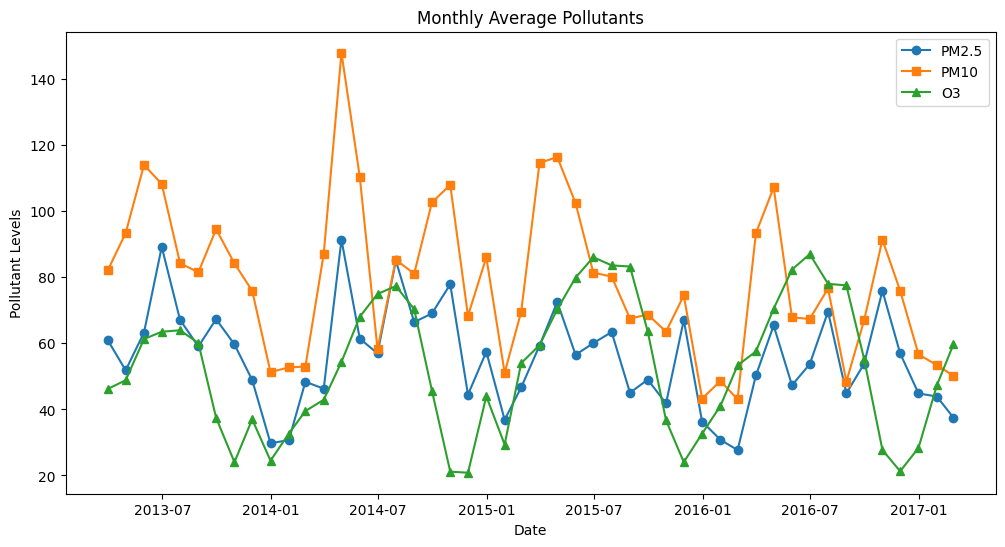

In [53]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('date', inplace=True)

# Ensure all columns used in resample are numeric
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
monthly_mean = df[numeric_columns].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_mean['pm2.5'], label='PM2.5', marker='o')
plt.plot(monthly_mean['pm10'], label='PM10', marker='s')
plt.plot(monthly_mean['o3'], label='O3', marker='^')
plt.title("Monthly Average Pollutants")
plt.xlabel("Date")
plt.ylabel("Pollutant Levels")
plt.legend()
plt.show()

### Pertanyaan 2:

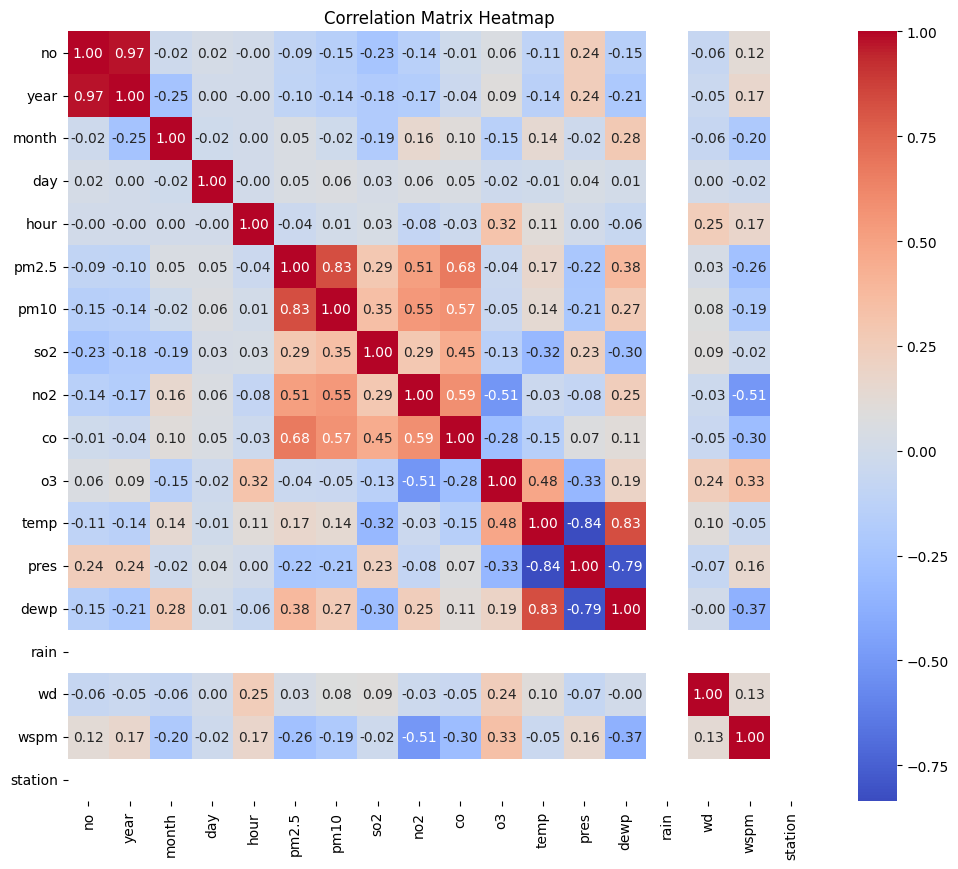

In [54]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Ubah kolom string menjadi angka menggunakan encoding
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

# Hitung matriks korelasi
correlation_matrix = df.corr()

# Plot heatmap matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

**Insight:**
- mengetahui tren data setiap tahun
- mengetahui korelasi antar fitur

## Analisis Lanjutan (Opsional)

# RFM Analysis

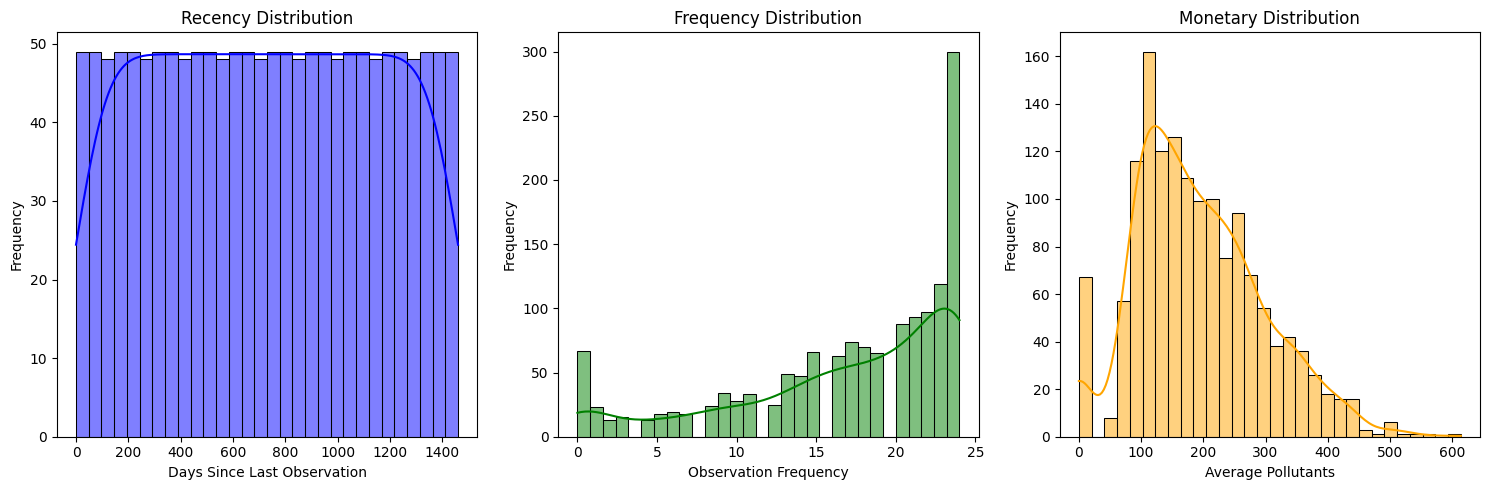

In [57]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('date', inplace=True)

# Resampling data untuk Frequency dan Monetary
daily_data = df.resample('D').mean()

# Recency: Hari terakhir pengamatan berdasarkan index resampled data
recency = (daily_data.index.max() - daily_data.index).days

# Frequency: Berapa kali data tercatat per hari
frequency = df.resample('D').size()

# Monetary: Rata-rata konsentrasi total polutan per hari
monetary = daily_data[['pm2.5', 'pm10', 'o3']].sum(axis=1)

# Gabungkan hasil RFM ke dalam DataFrame baru
rfm = pd.DataFrame({
    'recency': recency,
    'frequency': frequency,
    'monetary': monetary
})

# Visualisasi RFM
plt.figure(figsize=(15, 5))

# Recency Distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm['recency'], kde=True, bins=30, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Observation')
plt.ylabel('Frequency')

# Frequency Distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm['frequency'], kde=True, bins=30, color='green')
plt.title('Frequency Distribution')
plt.xlabel('Observation Frequency')
plt.ylabel('Frequency')

# Monetary Distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm['monetary'], kde=True, bins=30, color='orange')
plt.title('Monetary Distribution')
plt.xlabel('Average Pollutants')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Insight:

- Data menunjukkan pengamatan kualitas udara yang terdistribusi secara merata dari waktu ke waktu (Recency) dan dilakukan secara rutin (Frequency).
- Tingkat polutan total cenderung rendah pada sebagian besar hari, dengan beberapa kejadian luar biasa yang menyebabkan lonjakan (Monetary).
- Konsistensi pengamatan dan adanya puncak polutan tertentu dapat digunakan untuk mengevaluasi kejadian musiman atau potensi sumber pencemaran tertentu.


## Conclusion

- Polutan PM2.5 dan PM10 menunjukkan pola fluktuasi yang serupa, dengan peningkatan signifikan pada periode tertentu yang mungkin terkait dengan aktivitas musiman atau kejadian luar biasa. Sebaliknya, ozon menunjukkan pola musiman yang berlawanan, kemungkinan dipengaruhi oleh kondisi atmosfer seperti sinar matahari atau suhu.
- Terdapat korelasi positif antara SO₂, NO₂, dan CO dengan tingkat PM2.5 dan PM10, dengan CO dan NO₂ menunjukkan hubungan yang lebih kuat. Sebaliknya, O₃ memiliki korelasi negatif dengan keduanya, yang mungkin dipengaruhi oleh dinamika atmosfer yang berbeda